## Regression with a Mohs Hardness Dataset

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, silhouette_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from scipy.stats import chi2
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
import warnings

warnings.filterwarnings("ignore")

In [2]:
mohs_df = pd.read_csv("train.csv")
mohs_df.head(10)

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.86481,6.0
5,5,131.0,24.529328,21.833333,4.666667,50.131500,11.948200,2.858333,1.758333,0.896667,0.466388,2.94712,6.0
6,6,50.0,3.253996,10.000000,4.800000,20.077018,11.023840,2.727000,1.767000,0.880000,0.499010,0.80631,2.0
7,7,30.0,2.701748,6.000000,4.000000,11.663548,12.415840,2.766000,1.495000,0.710000,0.618493,0.41631,4.0
8,8,120.0,14.632000,12.000000,4.800000,24.808518,11.331820,2.870000,1.718500,0.910000,0.492736,1.96268,6.0
9,9,97.0,13.477328,12.812500,5.000000,24.988133,11.037175,2.818750,1.601250,0.881250,0.493192,1.10889,5.8


Exploratory data analysis

In [3]:
mohs_df.isna().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

In [4]:
mohs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10407.0,5203.000000,3004.386460,0.0,2601.500000,5203.000000,7804.500000,10406.000000
allelectrons_Total,10407.0,128.053516,224.123776,0.0,68.000000,100.000000,131.000000,15300.000000
density_Total,10407.0,14.491342,15.972877,0.0,7.558488,10.650000,16.676996,643.093804
allelectrons_Average,10407.0,17.033222,10.468734,0.0,10.000000,12.600000,22.000000,67.000000
val_e_Average,10407.0,4.546789,0.690864,0.0,4.000000,4.714286,4.800000,6.000000
atomicweight_Average,10407.0,37.507703,26.012313,0.0,20.298893,26.203827,48.719500,167.400000
ionenergy_Average,10407.0,10.938308,1.408276,0.0,10.590660,11.202760,11.670725,15.245810
el_neg_chi_Average,10407.0,2.607662,0.334906,0.0,2.530000,2.706000,2.805000,3.443000
R_vdw_element_Average,10407.0,1.731330,0.192481,0.0,1.672500,1.732727,1.800000,2.250000
R_cov_element_Average,10407.0,0.944132,0.180017,0.0,0.864000,0.915556,0.981667,1.615840


In [41]:
mohs_df.shape

(10407, 12)

In [5]:
mohs_df.duplicated().sum()

0

In [6]:
mohs_df_copy = mohs_df

# Drop column 'B' in-place
mohs_df_copy.drop('id', axis=1, inplace=False)

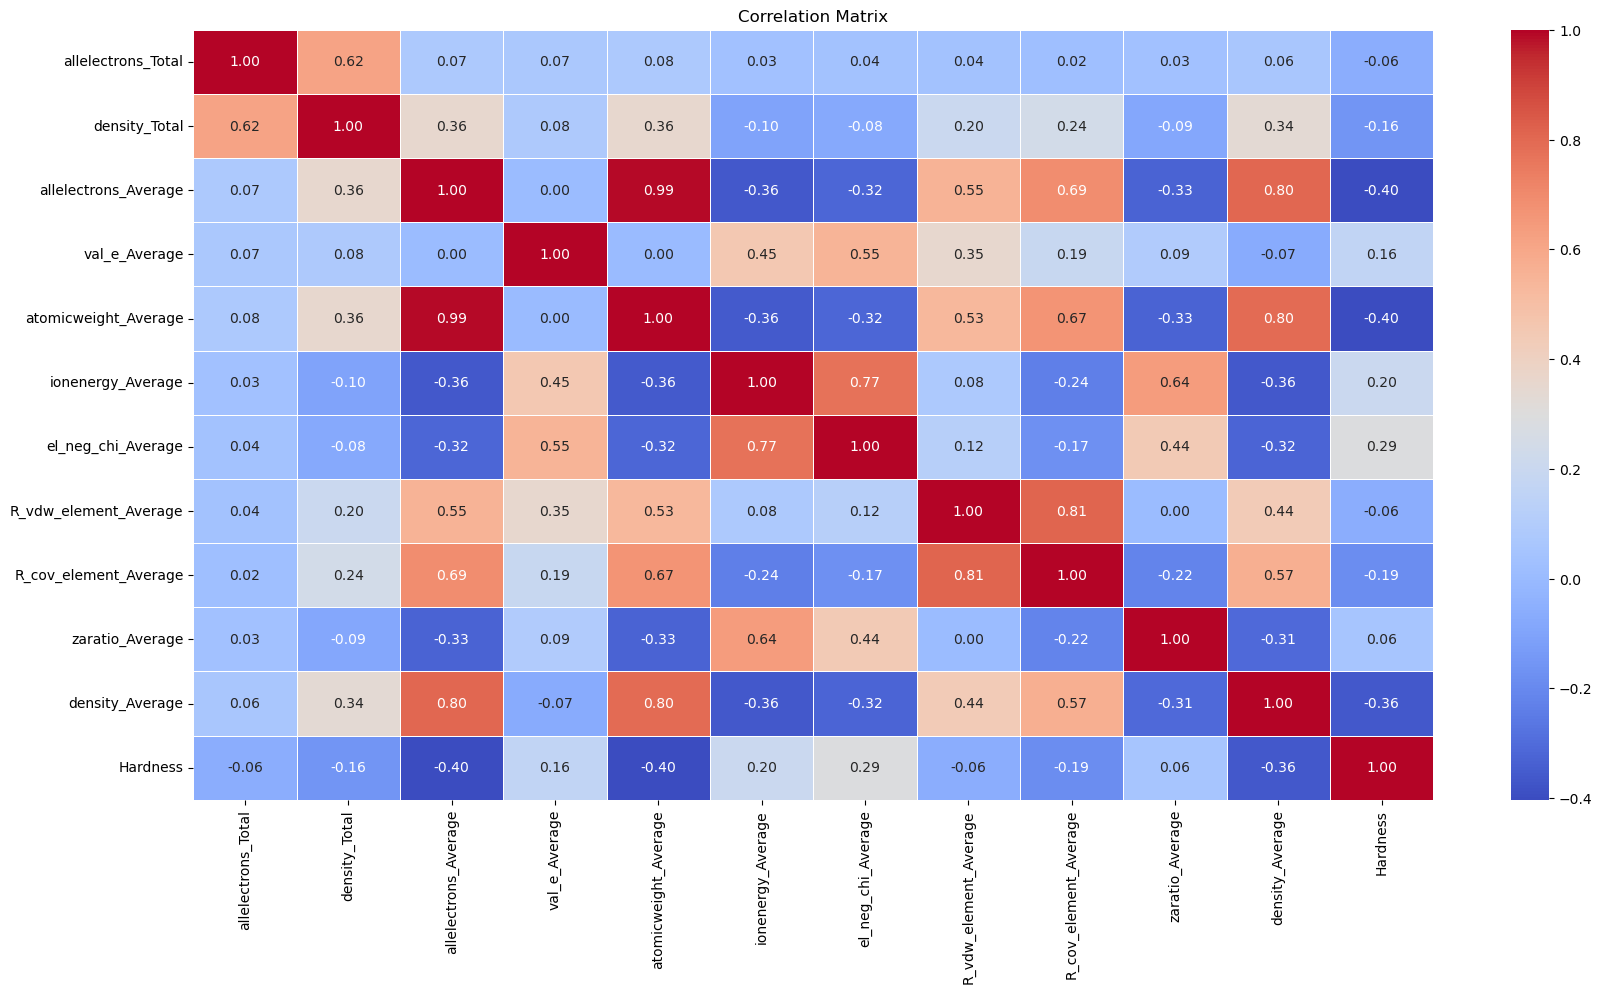

In [9]:
mohs_df_corr = mohs_df_copy.corr()

mohs_df_corr
# credit_card_corr = credit_card_df.corr()

plt.figure(figsize=(20, 10))

sns.heatmap(mohs_df_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Correlation Matrix')

plt.show()

In [28]:
X = mohs_df_copy.iloc[0:, :-1]
X = X.values
X

array([[100.        ,   0.841611  ,  10.        , ...,   0.86      ,
          0.49607   ,   0.91457   ],
       [100.        ,   7.558488  ,  10.        , ...,   0.91      ,
          0.492719  ,   0.7176    ],
       [ 76.        ,   8.885992  ,  15.6       , ...,   0.864     ,
          0.481478  ,   1.50633   ],
       ...,
       [196.        ,  30.92      ,  24.5       , ...,   1.12      ,
          0.469715  ,   2.1154    ],
       [ 38.        ,   1.55316   ,  12.66666667, ...,   0.98      ,
          0.48650667,   0.77755   ],
       [288.        ,  24.655328  ,  11.14285714, ...,   0.94      ,
          0.49391857,   0.97737   ]])

In [29]:
y = mohs_df_copy['Hardness']
y = y.values
y

array([6. , 6.5, 2.5, ..., 1.8, 6. , 6.5])

In [78]:
rdfc_model = RandomForestRegressor(n_estimators=192, random_state=42)

rdfc_model.fit(X, y)

RandomForestRegressor(n_estimators=192, random_state=42)

In [47]:
y_pred = rdfc_model.predict(X)

y_pred

mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.2125331599920038


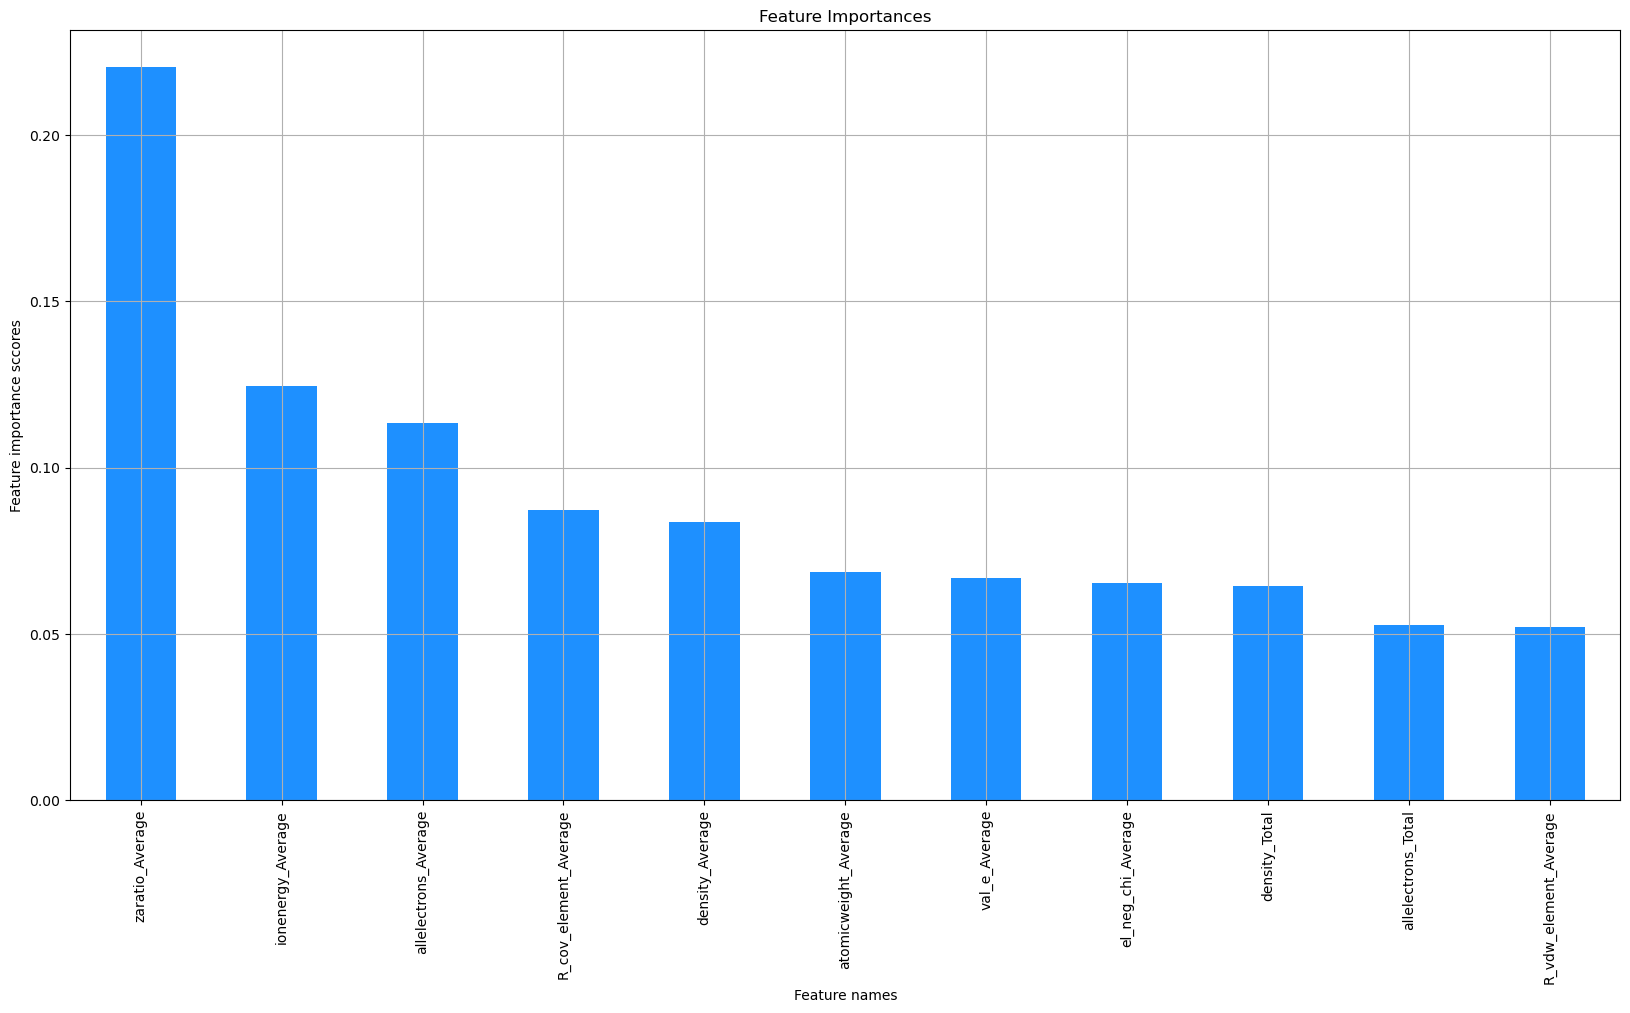

In [56]:
labels_of_features = mohs_df_copy.columns[:-1]

# labels_of_features
selected_feauture = rdfc_model.feature_importances_

importances_features = pd.Series(selected_feauture, index=labels_of_features)


importances_features = importances_features.sort_values(ascending=False)

plt.figure(figsize=(20, 10))

importances_features.plot(kind='bar', color="dodgerblue")

plt.title('Feature Importances')

plt.grid()

plt.xlabel("Feature names")

plt.ylabel("Feature importance sccores")

plt.show()

In [57]:
feature_selection_model = SelectFromModel(rdfc_model, 
                                          prefit=True, 
                                          threshold="mean")

feature_selection_model.fit(X,y)

X_feature_selected=feature_selection_model.transform(X)

X_feature_selected

# get the features selected
support_mask = feature_selection_model.get_support()

selected_features = [feature for bool, feature in zip(support_mask, labels_of_features) if bool]

print(f"Selected features {len(selected_features)}")
final_feature = ', '.join(selected_features)
final_feature

Selected features 3


'allelectrons_Average, ionenergy_Average, zaratio_Average'

In [63]:
X_selected = mohs_df_copy[list(selected_features)]
X_selected  = X_selected.values
X_selected

array([[10.        , 11.0881    ,  0.49607   ],
       [10.        , 12.04083   ,  0.492719  ],
       [15.6       , 12.0863    ,  0.481478  ],
       ...,
       [24.5       , 10.0743    ,  0.469715  ],
       [12.66666667, 11.29003333,  0.48650667],
       [11.14285714, 10.96035714,  0.49391857]])

In [68]:
rdfr_model1 = RandomForestRegressor(n_estimators=192, random_state=0)

rdfr_model1.fit(X_selected, y)

RandomForestRegressor(n_estimators=192, random_state=0)

In [72]:
y_pred = rdfr_model1.predict(X_selected)

y_pred

mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.46856465614035725


In [94]:
mohs_test = pd.read_csv('test.csv')
# mohs_test.drop("id", axis=1, inplace=True)
mohs_features = mohs_test.columns[1:]

Index(['allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average'],
      dtype='object')

In [96]:
mohs_test[mohs_features].head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,884.0,121.420000,35.36,5.28,82.561240,9.370384,2.298,1.9072,1.200000,0.461899,1.79459
1,90.0,9.931960,18.00,5.60,39.568056,12.086300,2.868,1.6520,0.864000,0.476196,1.41194
2,116.0,7.767992,11.60,4.80,23.231818,11.023840,2.644,1.7940,0.960000,0.499514,0.78834
3,100.0,9.107996,10.00,4.80,20.298893,12.086300,2.828,1.6620,0.792000,0.495796,1.20466
4,55.0,4.030000,11.00,4.00,22.977675,11.280950,2.455,1.7500,0.893333,0.476095,0.93456


In [97]:
X_test = mohs_test[mohs_features]
X_test = X_test.values
X_test

array([[8.84000000e+02, 1.21420000e+02, 3.53600000e+01, ...,
        1.20000000e+00, 4.61899200e-01, 1.79459000e+00],
       [9.00000000e+01, 9.93196000e+00, 1.80000000e+01, ...,
        8.64000000e-01, 4.76196000e-01, 1.41194000e+00],
       [1.16000000e+02, 7.76799200e+00, 1.16000000e+01, ...,
        9.60000000e-01, 4.99514000e-01, 7.88340000e-01],
       ...,
       [6.80000000e+01, 4.54532800e+00, 1.13333333e+01, ...,
        9.16666667e-01, 4.99074167e-01, 7.34250000e-01],
       [4.00000000e+01, 2.33416350e+00, 6.66666667e+00, ...,
        6.16666667e-01, 6.63796667e-01, 5.12270000e-01],
       [1.34000000e+02, 1.75900000e+01, 6.70000000e+01, ...,
        1.41000000e+00, 4.01635000e-01, 4.40350000e-01]])

In [98]:
y_pred = rdfc_model.predict(X_test)

In [101]:
mohs_test['Hardness'] = y_pred

mohs_test

result = mohs_test[['id', 'Hardness']]

result.to_csv("result.csv", index=False)